In [1]:
import json

# Ścieżka do pliku JSON
# Użyj r"..." (raw string) dla ścieżek w Windows, aby uniknąć problemów z backslashami
file_path = r"C:\Users\anton\Downloads\paczkomaty.json"

# Spróbuj otworzyć i załadować plik JSON
try:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print(f"Plik '{file_path}' został pomyślnie załadowany.")
except FileNotFoundError:
    print(f"Błąd: Nie znaleziono pliku pod ścieżką: {file_path}")
except json.JSONDecodeError as e:
    print(f"Błąd podczas dekodowania JSON: {e}")
except Exception as e:
    print(f"Wystąpił nieoczekiwany błąd: {e}")

# Jeśli dane zostały załadowane, możesz z nimi pracować
if 'data' in locals(): # Sprawdza, czy zmienna 'data' istnieje
    print(f"Typ załadowanych danych: {type(data)}")
    
    # JSON, który podałeś, to lista obiektów (słowników w Pythonie)
    if isinstance(data, list):
        print(f"Liczba paczkomatów w pliku: {len(data)}")
        
        if len(data) > 0:
            print("\nPrzykładowy pierwszy element (paczkomat):")
            # Wydrukuj pierwszy element w ładniejszym formacie
            # Użyj ensure_ascii=False, aby poprawnie wyświetlić polskie znaki
            print(json.dumps(data[0], indent=4, ensure_ascii=False))
            
            print(f"\nNazwa pierwszego paczkomatu: {data[0].get('name')}")
            print(f"Status pierwszego paczkomatu: {data[0].get('status')}")
            print(f"Miasto pierwszego paczkomatu: {data[0].get('address_details', {}).get('city')}")
            
            # Możesz iterować po wszystkich paczkomatach
            # print("\nLista miast (pierwsze 5):")
            # for i, paczkomat in enumerate(data[:5]): # Tylko pierwsze 5 dla przykładu
            #    city = paczkomat.get('address_details', {}).get('city')
            #    name = paczkomat.get('name')
            #    print(f"{i+1}. {name}: {city}")
    elif isinstance(data, dict):
        print(f"Klucze w głównym obiekcie JSON: {list(data.keys())}")

Plik 'C:\Users\anton\Downloads\paczkomaty.json' został pomyślnie załadowany.
Typ załadowanych danych: <class 'list'>
Liczba paczkomatów w pliku: 32453

Przykładowy pierwszy element (paczkomat):
{
    "href": "https://api-pl-points.easypack24.net/v1/points/ADA01M",
    "name": "ADA01M",
    "type": [
        "parcel_locker"
    ],
    "status": "Operating",
    "location": {
        "longitude": 22.26405,
        "latitude": 51.73834
    },
    "location_type": "Outdoor",
    "location_date": null,
    "location_description": "Przy sklepie Lewiatan",
    "location_description_1": null,
    "location_description_2": null,
    "distance": null,
    "opening_hours": "24/7",
    "address": {
        "line1": "Kościuszki 27",
        "line2": "21-412 Adamów"
    },
    "address_details": {
        "city": "Adamów",
        "province": "lubelskie",
        "post_code": "21-412",
        "street": "Kościuszki",
        "building_number": "27",
        "flat_number": null
    },
    "phone_numb

In [2]:
import csv
import os # Do operacji na ścieżkach plików

# Zakładam, że zmienna 'data' zawiera już załadowane dane JSON (listę słowników)
# oraz 'file_path' to ścieżka do oryginalnego pliku JSON

if 'data' in locals() and isinstance(data, list) and data:
    # Utwórz ścieżkę do pliku CSV w tym samym folderze co plik JSON
    input_directory = os.path.dirname(file_path)
    output_csv_filename = "paczkomaty.csv"
    output_csv_path = os.path.join(input_directory, output_csv_filename)

    print(f"Dane zostaną zapisane do: {output_csv_path}")

    try:
        # 1. Zbierz wszystkie unikalne klucze ze wszystkich słowników, aby utworzyć nagłówki
        #    To zapewni, że wszystkie kolumny zostaną uwzględnione, nawet jeśli nie każdy obiekt ma każdy klucz.
        all_keys = set()
        for item in data:
            if isinstance(item, dict):
                all_keys.update(item.keys())
            else:
                print(f"Ostrzeżenie: Element w danych nie jest słownikiem: {type(item)}. Pomijanie przy zbieraniu kluczy.")
        
        # Sortujemy klucze, aby kolejność kolumn w CSV była spójna
        fieldnames = sorted(list(all_keys))

        if not fieldnames:
            print("Błąd: Nie udało się ustalić nagłówków (kluczy) dla pliku CSV. Czy dane są puste lub w złym formacie?")
        else:
            # 2. Zapisz dane do pliku CSV
            with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

                # Zapisz nagłówek (pierwszy wiersz z nazwami kolumn)
                writer.writeheader()

                # Zapisz wszystkie wiersze danych
                # writer.writerows(data) # To zadziała, jeśli wszystkie obiekty to słowniki
                
                # Bardziej odporne podejście, jeśli niektóre elementy 'data' mogłyby nie być słownikami (choć nie powinno tak być)
                for row_dict in data:
                    if isinstance(row_dict, dict):
                        # DictWriter sam poradzi sobie z konwersją list/słowników w wartościach na stringi
                        # np. list ['a', 'b'] zostanie zapisany jako "['a', 'b']"
                        writer.writerow(row_dict)
                    else:
                        # Możesz zdecydować, jak obsłużyć elementy, które nie są słownikami
                        # np. zapisać pusty wiersz z odpowiednią liczbą przecinków lub pominąć
                        print(f"Ostrzeżenie: Pomijanie zapisu elementu, który nie jest słownikiem: {type(row_dict)}")


            print(f"Pomyślnie zapisano dane do pliku CSV: {output_csv_path}")
            print(f"Liczba zapisanych paczkomatów: {len(data)}")
            print(f"Użyte nagłówki (kolumny): {fieldnames}")

    except IOError:
        print(f"Błąd wejścia/wyjścia: Nie można zapisać pliku pod ścieżką {output_csv_path}")
    except Exception as e:
        print(f"Wystąpił nieoczekiwany błąd podczas zapisywania do CSV: {e}")
        
elif 'data' not in locals():
    print("Błąd: Zmienna 'data' nie istnieje. Najpierw załaduj dane z pliku JSON.")
elif not isinstance(data, list):
    print(f"Błąd: Zmienna 'data' nie jest listą (jest typu: {type(data)}). Oczekiwano listy słowników.")
elif not data:
    print("Błąd: Zmienna 'data' jest pusta. Nie ma nic do zapisania.")

Dane zostaną zapisane do: C:\Users\anton\Downloads\paczkomaty.csv
Pomyślnie zapisano dane do pliku CSV: C:\Users\anton\Downloads\paczkomaty.csv
Liczba zapisanych paczkomatów: 32453
Użyte nagłówki (kolumny): ['address', 'address_details', 'agency', 'air_index_level', 'apm_doubled', 'distance', 'easy_access_zone', 'functions', 'href', 'image_url', 'is_next', 'location', 'location_247', 'location_date', 'location_description', 'location_description_1', 'location_description_2', 'location_type', 'name', 'opening_hours', 'operating_hours_extended', 'partner_id', 'payment_available', 'payment_point_descr', 'payment_type', 'phone_number', 'physical_type_description', 'physical_type_mapped', 'recommended_low_interest_box_machines_list', 'status', 'type', 'virtual']


--- Wczytywanie danych Shapefile ---
Wczytano: buildings (gis_osm_buildings_a_free_1.shp) - 1540045 obiektów, CRS: EPSG:4326
Wczytano: landuse (gis_osm_landuse_a_free_1.shp) - 358997 obiektów, CRS: EPSG:4326
Wczytano: natural_areas (gis_osm_natural_a_free_1.shp) - 205 obiektów, CRS: EPSG:4326
Wczytano: natural_points_lines (gis_osm_natural_free_1.shp) - 175313 obiektów, CRS: EPSG:4326
Wczytano: places_areas (gis_osm_places_a_free_1.shp) - 56 obiektów, CRS: EPSG:4326
Wczytano: places_points (gis_osm_places_free_1.shp) - 18513 obiektów, CRS: EPSG:4326
Wczytano: pofw_areas (gis_osm_pofw_a_free_1.shp) - 2098 obiektów, CRS: EPSG:4326
Wczytano: pofw_points (gis_osm_pofw_free_1.shp) - 237 obiektów, CRS: EPSG:4326
Wczytano: pois_areas (gis_osm_pois_a_free_1.shp) - 23613 obiektów, CRS: EPSG:4326
Wczytano: pois_points (gis_osm_pois_free_1.shp) - 61298 obiektów, CRS: EPSG:4326
Wczytano: railways (gis_osm_railways_free_1.shp) - 7075 obiektów, CRS: EPSG:4326
Wczytano: roads (gis_osm_roads_free_1.sh

C:\Users\anton\AppData\Local\Temp\ipykernel_19012\2845490236.py:205: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()
C:\Users\anton\AppData\Local\Temp\ipykernel_19012\2845490236.py:210: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Legenda", loc="lower right", fontsize='small', bbox_to_anchor=(1.1, 0))


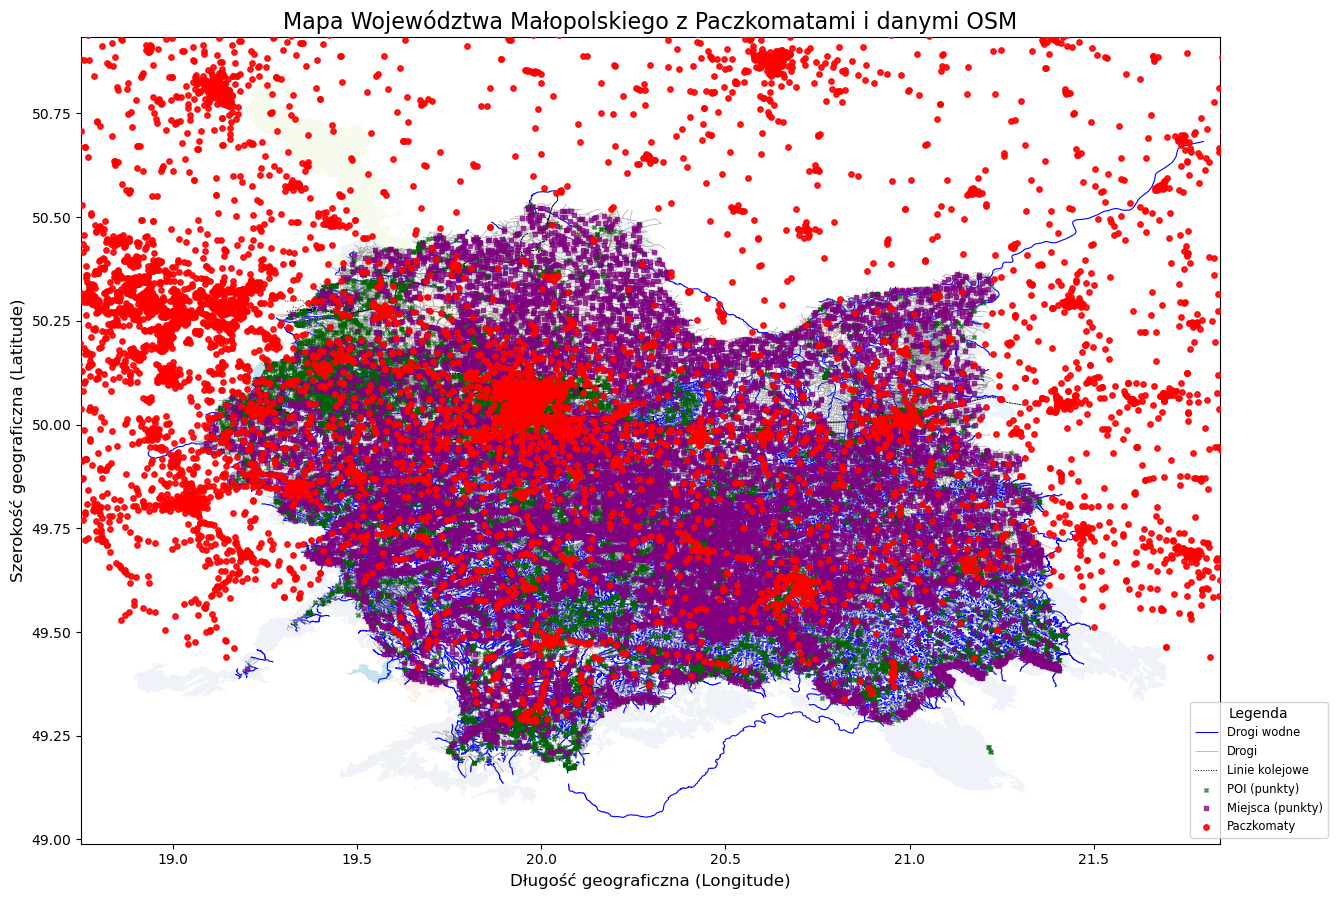


--- Zakończono ---


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import ast # Importujemy moduł ast do parsowania stringów

# --- Konfiguracja Ścieżek ---
malopolskie_shp_folder = r"C:\Users\anton\OneDrive\Pulpit\Mastercard\zach"
paczkomaty_csv_path = r"C:\Users\anton\Downloads\paczkomaty.csv"

# --- Lista kategorii i mapowanie na nazwy plików Shapefile ---
geofabrik_layers_config = {
    "buildings": "gis_osm_buildings_a_free_1.shp",
    "landuse": "gis_osm_landuse_a_free_1.shp",
    "natural_areas": "gis_osm_natural_a_free_1.shp",
    "natural_points_lines": "gis_osm_natural_free_1.shp",
    "places_areas": "gis_osm_places_a_free_1.shp",
    "places_points": "gis_osm_places_free_1.shp",
    "pofw_areas": "gis_osm_pofw_a_free_1.shp",
    "pofw_points": "gis_osm_pofw_free_1.shp",
    "pois_areas": "gis_osm_pois_a_free_1.shp",
    "pois_points": "gis_osm_pois_free_1.shp",
    "railways": "gis_osm_railways_free_1.shp",
    "roads": "gis_osm_roads_free_1.shp",
    "traffic_areas": "gis_osm_traffic_a_free_1.shp",
    "traffic_points": "gis_osm_traffic_free_1.shp",
    "transport_areas": "gis_osm_transport_a_free_1.shp",
    "transport_points": "gis_osm_transport_free_1.shp",
    "water_areas": "gis_osm_water_a_free_1.shp",
    "waterways": "gis_osm_waterways_free_1.shp"
}

geo_data = {}

# --- Krok 1: Wczytywanie danych Shapefile ---
print("--- Wczytywanie danych Shapefile ---")
for category_key, shp_filename in geofabrik_layers_config.items():
    shp_file_path = os.path.join(malopolskie_shp_folder, shp_filename)
    if os.path.exists(shp_file_path):
        try:
            gdf = gpd.read_file(shp_file_path)
            geo_data[category_key] = gdf
            print(f"Wczytano: {category_key} ({shp_filename}) - {len(gdf)} obiektów, CRS: {gdf.crs}")
        except Exception as e:
            print(f"Błąd podczas wczytywania {shp_filename} dla kategorii {category_key}: {e}")
    else:
        print(f"Plik nie istnieje dla kategorii {category_key}: {shp_file_path}")

# --- Krok 2: Wczytywanie i przygotowanie danych o paczkomatach z CSV ---
print("\n--- Wczytywanie danych o paczkomatach ---")
paczkomaty_gdf = None # Inicjalizacja na wypadek błędów
try:
    paczkomaty_df = pd.read_csv(paczkomaty_csv_path)
    print(f"Wczytano paczkomaty.csv: {len(paczkomaty_df)} wierszy.")

    if 'location' in paczkomaty_df.columns:
        print("Znaleziono kolumnę 'location'. Próba parsowania współrzędnych...")
        
        # Funkcja do parsowania stringa lokalizacji i wyciągania współrzędnych
        def parse_location_string(loc_str):
            try:
                # Sprawdź, czy to nie jest NaN lub pusty string
                if pd.isna(loc_str) or not isinstance(loc_str, str) or loc_str.strip() == "":
                    return None, None
                # Użyj ast.literal_eval do bezpiecznego sparsowania stringa do słownika
                loc_dict = ast.literal_eval(loc_str)
                if isinstance(loc_dict, dict):
                    return loc_dict.get('longitude'), loc_dict.get('latitude')
                else:
                    return None, None # Jeśli sparsowany obiekt nie jest słownikiem
            except (ValueError, SyntaxError, TypeError) as e:
                # print(f"Błąd parsowania stringa lokalizacji '{loc_str}': {e}")
                return None, None # Zwróć None w przypadku błędu parsowania

        # Zastosuj funkcję do kolumny 'location' aby stworzyć nowe kolumny
        parsed_coords = paczkomaty_df['location'].apply(lambda x: pd.Series(parse_location_string(x), index=['longitude_parsed', 'latitude_parsed']))
        paczkomaty_df['longitude'] = parsed_coords['longitude_parsed']
        paczkomaty_df['latitude'] = parsed_coords['latitude_parsed']

        # Sprawdź, ile współrzędnych udało się sparsować
        num_parsed = paczkomaty_df['longitude'].notna().sum()
        print(f"Pomyślnie sparsowano współrzędne dla {num_parsed} paczkomatów.")

        if num_parsed > 0:
            # Usuń wiersze, gdzie nie udało się sparsować współrzędnych
            paczkomaty_df.dropna(subset=['longitude', 'latitude'], inplace=True)
            
            paczkomaty_gdf = gpd.GeoDataFrame(
                paczkomaty_df,
                geometry=gpd.points_from_xy(paczkomaty_df.longitude, paczkomaty_df.latitude),
                crs="EPSG:4326"
            )
            print(f"Utworzono GeoDataFrame dla paczkomatów: {len(paczkomaty_gdf)} obiektów, CRS: {paczkomaty_gdf.crs}")
        else:
            print("Nie udało się sparsować żadnych współrzędnych z kolumny 'location'.")
            paczkomaty_gdf = None
            
    else:
        print("Błąd: Brak kolumny 'location' w pliku paczkomaty.csv, która jest potrzebna do uzyskania współrzędnych.")
        paczkomaty_gdf = None

except FileNotFoundError:
    print(f"Błąd: Nie znaleziono pliku {paczkomaty_csv_path}")
except Exception as e:
    print(f"Błąd podczas wczytywania lub przetwarzania paczkomaty.csv: {e}")


# --- Krok 3: Przygotowanie do wizualizacji - ujednolicenie CRS ---
display_crs = "EPSG:4326"
print(f"\n--- Ujednolicanie CRS do {display_crs} (jeśli konieczne) ---")
transformed_geo_data = {}
for key, gdf in geo_data.items():
    if gdf.crs != display_crs:
        print(f"Transformuję CRS dla {key} z {gdf.crs} do {display_crs}")
        transformed_geo_data[key] = gdf.to_crs(display_crs)
    else:
        transformed_geo_data[key] = gdf

paczkomaty_gdf_display = None # Inicjalizacja
if paczkomaty_gdf is not None:
    if paczkomaty_gdf.crs != display_crs:
        print(f"Transformuję CRS dla paczkomatów z {paczkomaty_gdf.crs} do {display_crs}")
        paczkomaty_gdf_display = paczkomaty_gdf.to_crs(display_crs)
    else:
        paczkomaty_gdf_display = paczkomaty_gdf


# --- Krok 4: Wizualizacja Mapy ---
print("\n--- Generowanie mapy ---")
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_aspect('equal')

map_boundary_layer_key = None
# Spróbuj znaleźć warstwę, która pokrywa cały obszar
boundary_candidates = ['landuse', 'roads', 'water_areas', 'natural_areas'] 
for candidate in boundary_candidates:
    if candidate in transformed_geo_data and transformed_geo_data[candidate] is not None and not transformed_geo_data[candidate].empty:
        map_boundary_layer_key = candidate
        break

if map_boundary_layer_key:
    minx, miny, maxx, maxy = transformed_geo_data[map_boundary_layer_key].total_bounds
    # Dodaj mały margines dla lepszej wizualizacji
    margin_x = (maxx - minx) * 0.05
    margin_y = (maxy - miny) * 0.05
    ax.set_xlim(minx - margin_x, maxx + margin_x)
    ax.set_ylim(miny - margin_y, maxy + margin_y)
    print(f"Ustawiono granice mapy na podstawie warstwy: {map_boundary_layer_key}")
else:
    print("Nie można ustalić granic mapy na podstawie warstw OSM. Mapa może nie wyświetlać się poprawnie.")

# Rysowanie warstw OSM
if 'landuse' in transformed_geo_data and not transformed_geo_data['landuse'].empty:
    transformed_geo_data['landuse'].plot(ax=ax, column='fclass', legend=False, alpha=0.3, categorical=True, cmap='Pastel2')
    print("Narysowano: landuse")

if 'water_areas' in transformed_geo_data and not transformed_geo_data['water_areas'].empty:
    transformed_geo_data['water_areas'].plot(ax=ax, color='lightblue', alpha=0.7, label='Wody (obszary)', zorder=1)
    print("Narysowano: water_areas")

if 'waterways' in transformed_geo_data and not transformed_geo_data['waterways'].empty:
    transformed_geo_data['waterways'].plot(ax=ax, color='blue', linewidth=0.8, label='Drogi wodne', zorder=2)
    print("Narysowano: waterways")
    
if 'natural_areas' in transformed_geo_data and not transformed_geo_data['natural_areas'].empty:
    transformed_geo_data['natural_areas'].plot(ax=ax, color='lightgreen', alpha=0.4, label='Tereny naturalne (obszary)', zorder=1)
    print("Narysowano: natural_areas")

if 'roads' in transformed_geo_data and not transformed_geo_data['roads'].empty:
    transformed_geo_data['roads'].plot(ax=ax, color='gray', linewidth=0.5, alpha=0.7, label='Drogi', zorder=3)
    print("Narysowano: roads")

if 'railways' in transformed_geo_data and not transformed_geo_data['railways'].empty:
    transformed_geo_data['railways'].plot(ax=ax, color='black', linestyle=':', linewidth=0.7, label='Linie kolejowe', zorder=4)
    print("Narysowano: railways")

# Budynki - PAMIĘTAJ, TO MOŻE BYĆ BARDZO WOLNE
# if 'buildings' in transformed_geo_data and not transformed_geo_data['buildings'].empty:
#     print("Rysowanie budynków (może być wolne)...")
#     transformed_geo_data['buildings'].plot(ax=ax, color='darkgray', alpha=0.3, label='Budynki', zorder=2)
#     print("Narysowano: buildings")
# else:
print("Pomijam rysowanie budynków dla szybkości (możesz odkomentować).")

# Punkty POI, Places, etc. (mniejsze elementy na wierzchu)
if 'pois_points' in transformed_geo_data and not transformed_geo_data['pois_points'].empty:
    transformed_geo_data['pois_points'].plot(ax=ax, marker='x', color='darkgreen', markersize=8, alpha=0.7, label='POI (punkty)', zorder=5)
    print("Narysowano: pois_points")

if 'places_points' in transformed_geo_data and not transformed_geo_data['places_points'].empty:
    transformed_geo_data['places_points'].plot(ax=ax, marker='s', color='purple', markersize=10, alpha=0.7, label='Miejsca (punkty)', zorder=5)
    print("Narysowano: places_points")

# Rysowanie paczkomatów na samym wierzchu
if paczkomaty_gdf_display is not None and not paczkomaty_gdf_display.empty:
    paczkomaty_gdf_display.plot(ax=ax, marker='o', color='red', markersize=15, label='Paczkomaty', alpha=0.9, zorder=10)
    print("Narysowano: Paczkomaty")
else:
    print("Brak danych o paczkomatach do narysowania.")

ax.set_title("Mapa Województwa Małopolskiego z Paczkomatami i danymi OSM", fontsize=16)
ax.set_xlabel("Długość geograficzna (Longitude)", fontsize=12)
ax.set_ylabel("Szerokość geograficzna (Latitude)", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
if handles: # Sprawdź czy są jakiekolwiek elementy do legendy
    if len(handles) > 10:
        ax.legend(handles[:10], labels[:10], title="Legenda (część)", loc="lower right", fontsize='small', bbox_to_anchor=(1.1, 0))
    else:
        ax.legend(title="Legenda", loc="lower right", fontsize='small', bbox_to_anchor=(1.1, 0))

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Dopasowanie z miejscem na legendę poza mapą
plt.show()

print("\n--- Zakończono ---")

In [5]:
import pandas as pd
import geopandas as gpd
import os
import ast
import folium # Importujemy folium
from folium.plugins import MarkerCluster # Do grupowania markerów paczkomatów
from branca.colormap import linear # Do tworzenia legendy dla warstw poligonowych

# --- Konfiguracja Ścieżek --- (TAK SAMO JAK WCZEŚNIEJ)
malopolskie_shp_folder = r"C:\Users\anton\OneDrive\Pulpit\Mastercard\zach"
paczkomaty_csv_path = r"C:\Users\anton\Downloads\paczkomaty.csv"

# --- Lista kategorii i mapowanie na nazwy plików Shapefile --- (TAK SAMO JAK WCZEŚNIEJ)
geofabrik_layers_config = {
    "buildings": "gis_osm_buildings_a_free_1.shp",
    "landuse": "gis_osm_landuse_a_free_1.shp",
    "natural_areas": "gis_osm_natural_a_free_1.shp",
    "natural_points_lines": "gis_osm_natural_free_1.shp",
    "places_areas": "gis_osm_places_a_free_1.shp",
    "places_points": "gis_osm_places_free_1.shp",
    "pofw_areas": "gis_osm_pofw_a_free_1.shp",
    "pofw_points": "gis_osm_pofw_free_1.shp",
    "pois_areas": "gis_osm_pois_a_free_1.shp",
    "pois_points": "gis_osm_pois_free_1.shp",
    "railways": "gis_osm_railways_free_1.shp",
    "roads": "gis_osm_roads_free_1.shp",
    "traffic_areas": "gis_osm_traffic_a_free_1.shp",
    "traffic_points": "gis_osm_traffic_free_1.shp",
    "transport_areas": "gis_osm_transport_a_free_1.shp",
    "transport_points": "gis_osm_transport_free_1.shp",
    "water_areas": "gis_osm_water_a_free_1.shp",
    "waterways": "gis_osm_waterways_free_1.shp"
}

geo_data = {}

# --- Krok 1: Wczytywanie danych Shapefile --- (TAK SAMO JAK WCZEŚNIEJ)
print("--- Wczytywanie danych Shapefile ---")
for category_key, shp_filename in geofabrik_layers_config.items():
    shp_file_path = os.path.join(malopolskie_shp_folder, shp_filename)
    if os.path.exists(shp_file_path):
        try:
            gdf = gpd.read_file(shp_file_path)
            geo_data[category_key] = gdf
            print(f"Wczytano: {category_key} ({shp_filename}) - {len(gdf)} obiektów, CRS: {gdf.crs}")
        except Exception as e:
            print(f"Błąd podczas wczytywania {shp_filename} dla kategorii {category_key}: {e}")
    else:
        print(f"Plik nie istnieje dla kategorii {category_key}: {shp_file_path}")

# --- Krok 2: Wczytywanie i przygotowanie danych o paczkomatach z CSV --- (TAK SAMO JAK WCZEŚNIEJ)
print("\n--- Wczytywanie danych o paczkomatach ---")
paczkomaty_gdf = None
try:
    paczkomaty_df = pd.read_csv(paczkomaty_csv_path)
    if 'location' in paczkomaty_df.columns:
        def parse_location_string(loc_str):
            try:
                if pd.isna(loc_str) or not isinstance(loc_str, str) or loc_str.strip() == "": return None, None
                loc_dict = ast.literal_eval(loc_str)
                if isinstance(loc_dict, dict): return loc_dict.get('longitude'), loc_dict.get('latitude')
                else: return None, None
            except: return None, None
        parsed_coords = paczkomaty_df['location'].apply(lambda x: pd.Series(parse_location_string(x), index=['longitude_parsed', 'latitude_parsed']))
        paczkomaty_df['longitude'] = parsed_coords['longitude_parsed']
        paczkomaty_df['latitude'] = parsed_coords['latitude_parsed']
        num_parsed = paczkomaty_df['longitude'].notna().sum()
        if num_parsed > 0:
            paczkomaty_df.dropna(subset=['longitude', 'latitude'], inplace=True)
            paczkomaty_gdf = gpd.GeoDataFrame(
                paczkomaty_df,
                geometry=gpd.points_from_xy(paczkomaty_df.longitude, paczkomaty_df.latitude),
                crs="EPSG:4326"
            )
            print(f"Utworzono GeoDataFrame dla paczkomatów: {len(paczkomaty_gdf)} obiektów, CRS: {paczkomaty_gdf.crs}")
        else: print("Nie udało się sparsować żadnych współrzędnych.")
    else: print("Błąd: Brak kolumny 'location'.")
except FileNotFoundError: print(f"Błąd: Nie znaleziono pliku {paczkomaty_csv_path}")
except Exception as e: print(f"Błąd podczas wczytywania paczkomaty.csv: {e}")


# --- Krok 3: Przygotowanie do wizualizacji - ujednolicenie CRS (do EPSG:4326 dla Folium) --- (TAK SAMO JAK WCZEŚNIEJ)
display_crs = "EPSG:4326" # Folium preferuje EPSG:4326
print(f"\n--- Ujednolicanie CRS do {display_crs} (jeśli konieczne) ---")
transformed_geo_data = {}
for key, gdf in geo_data.items():
    if gdf.crs is None: # Jeśli CRS nie jest zdefiniowany, spróbuj założyć EPSG:4326 (typowe dla OSM)
        print(f"Ostrzeżenie: Brak CRS dla warstwy {key}. Zakładam EPSG:4326.")
        try:
            transformed_geo_data[key] = gdf.set_crs(display_crs, allow_override=True) # Użyj ostrożnie
        except Exception as e_crs:
            print(f"Nie udało się ustawić CRS dla {key}: {e_crs}. Pomijam tę warstwę.")
            continue
    elif gdf.crs != display_crs:
        print(f"Transformuję CRS dla {key} z {gdf.crs} do {display_crs}")
        transformed_geo_data[key] = gdf.to_crs(display_crs)
    else:
        transformed_geo_data[key] = gdf

paczkomaty_gdf_display = None
if paczkomaty_gdf is not None:
    if paczkomaty_gdf.crs != display_crs:
        paczkomaty_gdf_display = paczkomaty_gdf.to_crs(display_crs)
    else:
        paczkomaty_gdf_display = paczkomaty_gdf


# --- Krok 4: Wizualizacja Mapy za pomocą Folium ---
print("\n--- Generowanie interaktywnej mapy Folium ---")

# Ustalenie środka mapy (np. środek bounding boxa dla Małopolski lub środek paczkomatów)
map_center = None
default_zoom = 10

if paczkomaty_gdf_display is not None and not paczkomaty_gdf_display.empty:
    # Środek na podstawie paczkomatów
    # Aby uzyskać centroid, musimy mieć wszystkie geometrie w jednym obiekcie
    center_geom = paczkomaty_gdf_display.unary_union.centroid
    map_center = [center_geom.y, center_geom.x] # Folium oczekuje [latitude, longitude]
elif 'landuse' in transformed_geo_data and not transformed_geo_data['landuse'].empty:
    # Środek na podstawie warstwy landuse
    bounds = transformed_geo_data['landuse'].total_bounds # minx, miny, maxx, maxy
    map_center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]
else:
    # Domyślny środek dla Polski/Małopolski
    map_center = [50.0647, 19.9450] # Kraków
    print("Nie udało się ustalić środka mapy z danych, używam domyślnego (Kraków).")


# Tworzenie mapy Folium
m = folium.Map(location=map_center, zoom_start=default_zoom, tiles="OpenStreetMap") # Można zmienić tiles np. na "CartoDB positron"

# Dodawanie warstw OSM do mapy
# UWAGA: Dodawanie bardzo dużych warstw GeoJSON (np. wszystkie budynki) może spowolnić mapę.
# Rozważ uproszczenie geometrii lub użycie mniejszych próbek dla bardzo dużych warstw.

# Funkcja pomocnicza do dodawania warstw GeoJSON z tooltipami
def add_geojson_layer(gdf, layer_name, style_function=None, tooltip_fields=None, feature_group_name=None, show=True):
    if gdf is not None and not gdf.empty:
        # Upewnij się, że GeoDataFrame jest w EPSG:4326
        if gdf.crs != "EPSG:4326":
            gdf = gdf.to_crs("EPSG:4326")

        # Sprawdź, czy mamy co najmniej jedną kolumnę poza 'geometry' do wyświetlenia
        if tooltip_fields is None:
            non_geom_cols = [col for col in gdf.columns if col != 'geometry']
            if non_geom_cols:
                tooltip_fields = non_geom_cols[:3] # Pokaż pierwsze 3 atrybuty
            else:
                tooltip_fields = [] # Brak dodatkowych atrybutów

        # Utwórz obiekt GeoJson
        geojson_data = folium.GeoJson(
            gdf,
            name=layer_name,
            style_function=style_function if style_function else lambda x: {'color': 'blue', 'weight': 1, 'opacity': 0.7, 'fillOpacity': 0.1},
            tooltip=folium.features.GeoJsonTooltip(fields=tooltip_fields, aliases=[f"{field.capitalize()}:" for field in tooltip_fields], localize=True) if tooltip_fields else None,
            show=show
        )
        
        if feature_group_name:
            fg = folium.FeatureGroup(name=feature_group_name, show=show)
            geojson_data.add_to(fg)
            fg.add_to(m)
        else:
            geojson_data.add_to(m)
        print(f"Dodano warstwę: {layer_name}")


# Definicje stylów (przykładowe)
style_landuse = lambda x: {'fillColor': '#c2e699', 'color': '#78c679', 'weight': 1, 'fillOpacity': 0.4}
style_water_areas = lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.6}
style_waterways = lambda x: {'color': 'blue', 'weight': 1.5, 'opacity': 0.8}
style_natural_areas = lambda x: {'fillColor': 'lightgreen', 'color': 'green', 'weight': 1, 'fillOpacity': 0.4}
style_roads = lambda x: {'color': 'gray', 'weight': 2, 'opacity': 0.7}
style_railways = lambda x: {'color': 'black', 'weight': 1.5, 'opacity': 0.8, 'dashArray': '5, 5'}
# Styl dla POI i Places (punkty - folium.CircleMarker będzie lepszy niż GeoJson dla wielu punktów)

# Dodawanie warstw OSM (te większe, poligonowe i liniowe)
if 'landuse' in transformed_geo_data: add_geojson_layer(transformed_geo_data['landuse'], 'Użycie terenu', style_landuse, tooltip_fields=['fclass', 'name'], feature_group_name='Użycie terenu', show=False) # Domyślnie ukryta
if 'water_areas' in transformed_geo_data: add_geojson_layer(transformed_geo_data['water_areas'], 'Wody (obszary)', style_water_areas, tooltip_fields=['name'], feature_group_name='Wody', show=True)
if 'waterways' in transformed_geo_data: add_geojson_layer(transformed_geo_data['waterways'], 'Drogi wodne', style_waterways, tooltip_fields=['name', 'fclass'], feature_group_name='Wody', show=True)
if 'natural_areas' in transformed_geo_data: add_geojson_layer(transformed_geo_data['natural_areas'], 'Tereny naturalne', style_natural_areas, tooltip_fields=['fclass', 'name'], feature_group_name='Tereny naturalne', show=False) # Domyślnie ukryta
if 'roads' in transformed_geo_data: add_geojson_layer(transformed_geo_data['roads'].sample(frac=0.5, random_state=1) if len(transformed_geo_data['roads']) > 50000 else transformed_geo_data['roads'], 'Drogi', style_roads, tooltip_fields=['fclass', 'name', 'maxspeed'], feature_group_name='Drogi', show=True) # Próbka dla dużych zbiorów
if 'railways' in transformed_geo_data: add_geojson_layer(transformed_geo_data['railways'], 'Linie kolejowe', style_railways, tooltip_fields=['fclass', 'name'], feature_group_name='Koleje', show=True)

# Dodawanie punktów POI i Places
# Dla punktów lepiej użyć folium.CircleMarker lub folium.Marker w pętli, zwłaszcza jeśli jest ich dużo.
# Tutaj uproszczona wersja z GeoJson, może być wolniejsza dla wielu punktów.
if 'pois_points' in transformed_geo_data: add_geojson_layer(transformed_geo_data['pois_points'], 'POI (punkty)', lambda x: {'color':'darkgreen'}, tooltip_fields=['fclass', 'name'], feature_group_name='POI', show=False)
if 'places_points' in transformed_geo_data: add_geojson_layer(transformed_geo_data['places_points'], 'Miejsca (punkty)', lambda x: {'color':'purple'}, tooltip_fields=['fclass', 'name'], feature_group_name='Miejsca', show=False)


# Dodawanie paczkomatów (jako markery, ewentualnie zgrupowane)
if paczkomaty_gdf_display is not None and not paczkomaty_gdf_display.empty:
    paczkomaty_fg = folium.FeatureGroup(name="Paczkomaty", show=True) # FeatureGroup dla paczkomatów
    
    # Użyj MarkerCluster jeśli paczkomatów jest dużo
    if len(paczkomaty_gdf_display) > 100: # Próg dla użycia MarkerCluster
        marker_cluster = MarkerCluster().add_to(paczkomaty_fg)
        target_for_markers = marker_cluster
        print("Używam MarkerCluster dla paczkomatów.")
    else:
        target_for_markers = paczkomaty_fg
        print("Używam pojedynczych markerów dla paczkomatów.")

    for idx, row in paczkomaty_gdf_display.iterrows():
        popup_html = f"""
        <b>Nazwa:</b> {row.get('name', 'Brak danych')}<br>
        <b>Adres:</b> {row.get('address.line1', 'Brak danych')}, {row.get('address.line2', '')}<br>
        <b>Status:</b> {row.get('status', 'Brak danych')}
        """
        # Upewnij się, że współrzędne są poprawne
        if pd.notna(row.geometry.y) and pd.notna(row.geometry.x):
            folium.Marker(
                location=[row.geometry.y, row.geometry.x],
                popup=folium.Popup(popup_html, max_width=300),
                tooltip=row.get('name', 'Paczkomat'),
                icon=folium.Icon(color='red', icon='cube', prefix='fa') # FontAwesome icon
            ).add_to(target_for_markers)
    paczkomaty_fg.add_to(m)
    print(f"Dodano {len(paczkomaty_gdf_display)} paczkomatów do mapy.")
else:
    print("Brak danych o paczkomatach do wyświetlenia na mapie Folium.")


# Dodanie kontrolki warstw
folium.LayerControl().add_to(m)

# Zapisywanie mapy do pliku HTML
output_map_path = os.path.join(os.path.dirname(paczkomaty_csv_path), "interaktywna_mapa_paczkomatow_malopolska.html")
try:
    m.save(output_map_path)
    print(f"\nInteraktywna mapa została zapisana jako: {output_map_path}")
    print("Możesz otworzyć ten plik w przeglądarce internetowej.")
except Exception as e_save:
    print(f"Błąd podczas zapisywania mapy: {e_save}")

# Wyświetlenie mapy w Jupyter Notebook (jeśli w nim pracujesz)
# W VS Code z rozszerzeniem Jupyter, mapa powinna się wyświetlić bezpośrednio.
# Jeśli nie, otwórz zapisany plik HTML.
# m # Odkomentuj, aby spróbować wyświetlić w notatniku

print("\n--- Zakończono generowanie mapy Folium ---")

ModuleNotFoundError: No module named 'folium'